# 05 Example - Function Scans

In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


## Define a measure function

In [28]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices, and adds a calculated value vsum
    """

    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1 = devices.v1.voltage
    d.v2 = devices.v2.voltage

    d.vsum = d.v1 + d.v2
    
    return d

## Define a function for FunctionScan

In [23]:
def sin_voltage(value):
    devices.v1.voltage = np.sin(10*value) + 1

## Experiments

### 1. 1D Scan with loop0 as FunctionScan

In [26]:
# Setup runinfo with loop0 as FunctionScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.FunctionScan(sin_voltage, ps.drange(0, 0.01, 1), dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Sweep(runinfo, devices)
expt.run()

sleep(1)

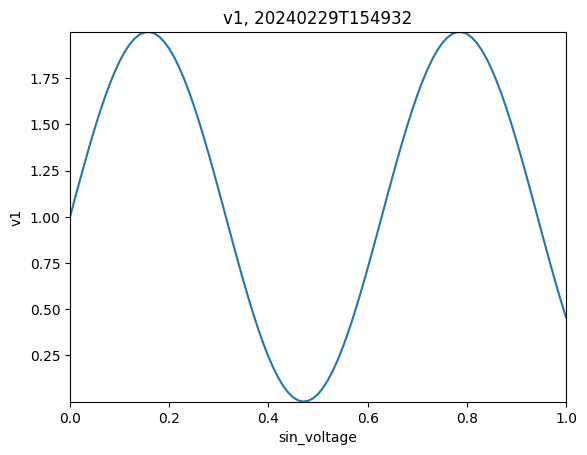

In [27]:
ps.live_plot1D(expt, data_name="v1")

### 2. 2D Scan with loop0 as FunctionScan

In [34]:
# Setup runinfo with loop0 as FunctionScan and loop1 as PropertyScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.FunctionScan(sin_voltage, ps.drange(0, 0.01, 1), dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 5)}, prop='voltage', dt=0.01)

runinfo.measure_function = get_voltage_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


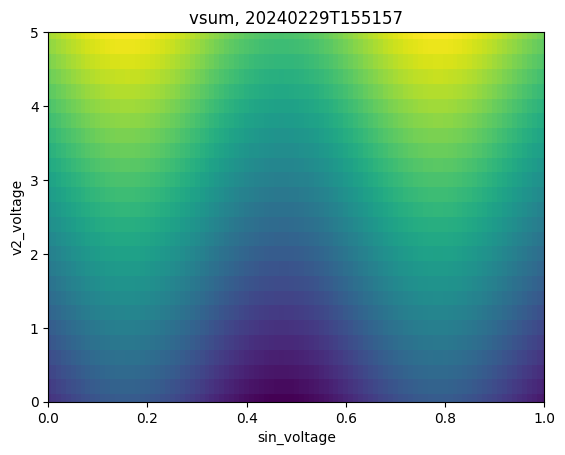

In [33]:
ps.live_plot2D(expt, data_name="vsum")